Nome: Ozea dos Santos Nascimento <br>
Data: 16/12/2022 <br>
<br>

♫ O Rio de Janeiro continua lindo... <br>
<br>
É a segunda maior metropole do nosso querido Brasil; palco de uma beleza exuberante, possuidor das mais belas praias e serras além de uma população sempre animada e festiva. Porém, nem tudo são flores na cidade maravilhosa. Mesmo com todas as maravilhas que uma grande metropole pode fornecer, não está livre de problemas como a desigualdade social e a violencia.<br>
<br>
Atualmente, a população através das redes sociais, tem demonstrado insatisfação por um possível aumento da violencia, tendo como causa principal, a volta de um antigo partido político. <br>
<br>
Analisaremos então, os dados fornecidos pelo ISP (Instituto de Segurança Pública), observando a escalada da violencia durante o periodo de  2017,2018,2019 e os meses de 2022, se houve algum aumento ou não da violencia. <br>

Esperamos também no final deste, realizar uma analise de sentimento da população atraves das redes sociais (Twitter)
<br><br><br>
Dados: ISP = http://www.isp.rj.gov.br/


Observar que, de acordo com o código penal vigente (2022), caracteriza-se "ROUBO" o crime de subtração de bens mediante ameaça armada.

CISP - Delegacia onde a ocorrencia fora regitrado <br>
mes - Mes da ocorrencia<br>
vano - Ano da ocorrencia <br>
munic - Municipio da ocorrencia<br>
mcirc - Codigo do municipio<br>
Regiao - Região da ocorrencia<br>
estupro - Estupro Violencia a mulher<br>
roubo_comercio - Roubo a Comerciantes<br>
roubo_residencia - Roubo à residencias<br>
roubo_veiculo - Roubo a Veiculos<br>
roubo_carga - Roubo de Cargas<br>
roubo_transeunte - Roubo a Pedestres<br> 
roubo_em_coletivo - Roubo a Transporte publico<br>
roubo_banco - Roubo a banco<br>
roubo_cx_eletronico - Roubo a caixas eletronicos<br>
roubo_celular - Roubo de celular<br>
roubo_conducao_saque - Roubo condução ao Saque<br>
roubo_apos_saque - Roubo Saidinha do Banco<br>
roubo_bicicleta - Roubo a bicicleta<br>
outros_roubos - Outros Roubos<br>
total_roubos - Total geral roubos<br>

========================================================

## Importando dados

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#import plotly.express as px

In [4]:
df_roubo = pd.read_csv('Base.csv', delimiter=';', encoding='ISO-8859-1') #Carregando o dataset
df_roubo = df_roubo.loc[df_roubo['ano']>=2017]#) & (df_roubo['ano']<=2019)] #Aplicando filtro para dados apartir do ano de 2017

#Criação do Dataframe, com apenas as colunas de interesse à nossa analise

df_roubo = df_roubo[['CISP', 'mes', 'ano','munic', 'mcirc', 'Regiao', 'estupro',  'roubo_comercio','roubo_residencia', 'roubo_veiculo', 'roubo_carga', 'roubo_transeunte','roubo_em_coletivo', 'roubo_banco', 'roubo_cx_eletronico',
'roubo_celular', 'roubo_conducao_saque', 'roubo_apos_saque','roubo_bicicleta', 'outros_roubos', 'total_roubos']]
df_roubo.head()

C:\Users\ozeas\AppData\Local\Temp\ipykernel_9292\1155578714.py:1: DtypeWarning: Columns (29,47,48,49,51,52,53,54) have mixed types. Specify dtype option on import or set low_memory=False.
  df_roubo = pd.read_csv('Base.csv', delimiter=';', encoding='ISO-8859-1') #Carregando o dataset


,CISP,mes,ano,munic,mcirc,Regiao,estupro,roubo_comercio,roubo_residencia,roubo_veiculo,...,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos
22357,1,1,2017,Rio de Janeiro,3304557,Capital,0,2,1,2,...,36,0,0,0,7,0,1,0,5,54
22358,4,1,2017,Rio de Janeiro,3304557,Capital,3,2,0,26,...,80,36,0,0,11,0,1,0,17,173
22359,5,1,2017,Rio de Janeiro,3304557,Capital,3,6,0,0,...,126,2,0,0,18,0,3,0,37,193
22360,6,1,2017,Rio de Janeiro,3304557,Capital,0,4,0,28,...,57,24,0,0,9,0,0,0,19,146
22361,7,1,2017,Rio de Janeiro,3304557,Capital,2,0,0,10,...,41,1,0,0,7,0,0,0,24,83


In [5]:
df_roubo['Regiao'].unique()

array(['Capital', 'Baixada Fluminense', 'Interior', 'Grande Niterói',
       'Capital           ', 'Interior          ', 'Grande Niterói    '],
      dtype=object)

# Tratamento de Dados

Após selecionarmos os dados importantes a nossa analise, o nosso dataframe possui as seguintes caracteristicas: <br>
Período analisado: 2017,2018 e 2019; <br>3608 registros; <br>21 colunas<br>não possui dados ausentes; <br> os tipos encontrados são: Object ( 03 - possivelmente sejam strings), float64 (18 - a ser convertidos para int)

In [6]:
df_roubo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9614 entries, 22357 to 31970
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   CISP                  9614 non-null   int64 
 1   mes                   9614 non-null   int64 
 2   ano                   9614 non-null   int64 
 3   munic                 9614 non-null   object
 4   mcirc                 9614 non-null   int64 
 5   Regiao                9614 non-null   object
 6   estupro               9614 non-null   int64 
 7   roubo_comercio        9614 non-null   int64 
 8   roubo_residencia      9614 non-null   int64 
 9   roubo_veiculo         9614 non-null   int64 
 10  roubo_carga           9614 non-null   int64 
 11  roubo_transeunte      9614 non-null   int64 
 12  roubo_em_coletivo     9614 non-null   int64 
 13  roubo_banco           9614 non-null   int64 
 14  roubo_cx_eletronico   9614 non-null   object
 15  roubo_celular         9614 non-nu

Não foram encontrados dados ausentes

In [7]:
df_roubo.isna().sum()

CISP                    0
mes                     0
ano                     0
munic                   0
mcirc                   0
Regiao                  0
estupro                 0
roubo_comercio          0
roubo_residencia        0
roubo_veiculo           0
roubo_carga             0
roubo_transeunte        0
roubo_em_coletivo       0
roubo_banco             0
roubo_cx_eletronico     0
roubo_celular           0
roubo_conducao_saque    0
roubo_apos_saque        0
roubo_bicicleta         0
outros_roubos           0
total_roubos            0
dtype: int64

Identificamos abaixo, os maiores valores presentes em nosso dataframe. Além disto, pode-se observar também a presença de espaços em branco nas colunas 'munic' e 'Regiao'. Estes espaços serão removidos

In [13]:
df_roubo.max()

CISP                              168
mes                                12
ano                              2022
munic                   Volta Redonda
mcirc                         9999999
Regiao                       Interior
estupro                            28
roubo_comercio                     35
roubo_residencia                   12
roubo_veiculo                     394
roubo_carga                       103
roubo_transeunte                  482
roubo_em_coletivo                 189
roubo_banco                         2
roubo_cx_eletronico                 5
roubo_celular                     205
roubo_conducao_saque                4
roubo_apos_saque                   13
roubo_bicicleta                     8
outros_roubos                     258
total_roubos                     1160
dtype: object

Removendo espaços em branco da coluna 'munic' e 'Região'

In [12]:
df_roubo['Regiao'].unique()

array(['Capital', 'Baixada Fluminense', 'Interior', 'Grande Niterói',
       'Capital '], dtype=object)

In [15]:
def tratamento(df):
    for i in range(df.shape[1]):
        #print(i)
        if df.iloc[:,i].dtypes == 'object':
            df.iloc[:,i] = df.iloc[:,i].str.replace("  ","").replace(' "','')
    return df
        #elif df.iloc[:,i].dtypes == 'float':
           #df.iloc[:,i] = df.iloc[:,i].astype('int64')
       
                            

df_roubo = tratamento(df_roubo)

AttributeError: Can only use .str accessor with string values!

In [34]:
total_roub_19['Regiao'][2] = total_roub_19['Regiao'][1]

C:\Users\ozeas\AppData\Local\Temp\ipykernel_9292\1654105632.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_roub_19['Regiao'][2] = total_roub_19['Regiao'][1]


In [36]:
total_roub_19

,Regiao,CISP,mes,ano,mcirc,estupro,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_celular,roubo_conducao_saque,roubo_apos_saque,outros_roubos,total_roubos
0,Baixada Fluminense,13212,1482,460332,753040464,1421,998,247,13165,2337,21045,3935,4,7649,25,241,5201,54884
1,Capital,5862,861,496674,812921022,842,1415,214,9943,1589,22211,5579,8,7566,38,294,7807,56732
2,Capital,5862,2337,496674,812921022,884,1149,178,8523,1556,18245,4196,4,6867,41,348,6219,47407
3,Grande Niterói,9204,780,242280,396465912,478,610,196,6158,1573,11232,1271,1,2372,9,132,3323,26889
4,Interior,100272,5226,1623276,3378990684,1825,833,295,1960,401,5596,373,3,2334,8,56,1515,13402


## 2017, 2018 e 2019
O ano de 2017, foi governado pelo vice presidente da República Michel Temer, que assumiu em 2016, após o impeachment da então presidente Dilma Rousseff. 
Duramte o ano de 2018, o Rio de Janeiro, estava mergulhado em uma onda de violência, o que forçou o vice presidente a recorrer a intervenção federal, que teve seu início em fevereiro de 2018 até dezembro do mesmo ano (após as eleições: out/2018).
O mesmo ano, foi marcado também pelas eleições, onde haviam candidatos como Jair Bolsonaro (Presidente da República) e Wilson Witzel (Governador RJ); estes prometeram combater duramente o crime organizado.
No ano de 2019; foi o inicio de um novo governo, com os candidatos citados, agora eleitos.

A partir da visualização abaixo, analisaremos se houve algum reflexo no número de roubos realizados durante os anos de 2017, 2018 e 2019.

C:\Users\ozeas\AppData\Local\Temp\ipykernel_9292\15968440.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total_roub_17 = df_roubo[df_roubo['ano'] == 2017].groupby('Regiao').sum().reset_index()
C:\Users\ozeas\AppData\Local\Temp\ipykernel_9292\15968440.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total_roub_18 = df_roubo[df_roubo['ano'] == 2018].groupby('Regiao').sum().reset_index()
C:\Users\ozeas\AppData\Local\Temp\ipykernel_9292\15968440.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either spec

,Regiao,2017,2018,2019
0,Baixada Fluminense,61735,60226,54884
1,Capital,123126,121111,56732
2,Grande Niterói,30512,33600,47407
3,Interior,15064,16669,26889


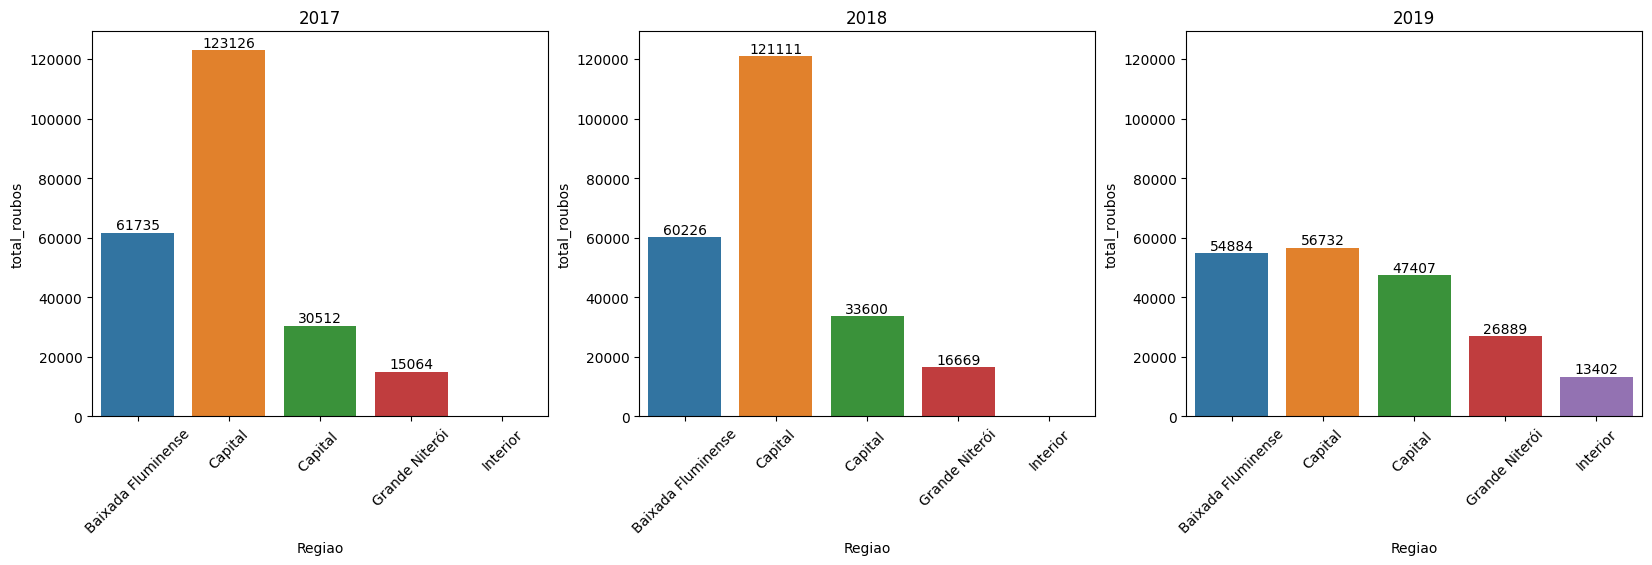

In [25]:
eixo = 0
max_y = 0

titulos = ['2017', '2018', '2019']

total_roub_17 = df_roubo[df_roubo['ano'] == 2017].groupby('Regiao').sum().reset_index()
total_roub_18 = df_roubo[df_roubo['ano'] == 2018].groupby('Regiao').sum().reset_index()
total_roub_19 = df_roubo[df_roubo['ano'] == 2019].groupby('Regiao').sum().reset_index()

coluna = 'Qtd de Roubos'

lst_dfs = [total_roub_17, total_roub_18, total_roub_19]

figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in lst_dfs:

    f= sns.barplot(x='Regiao' ,y='total_roubos', data = dataframe, ax=eixos[eixo])
    f.set(title=titulos[eixo])
    f.set_xticklabels(labels=f.get_xticklabels(), rotation=45)

    for i in f.containers:
       f.bar_label(i,)
    _, max_y_f = f.get_ylim()
    max_y = max_y_f if max_y_f > max_y else max_y
    f.set(ylim=(0, max_y))
    
    
    eixo += 1
    


figura.show()

total_roubos_17 = total_roub_17[['Regiao','total_roubos']]
total_roubos_17 = total_roubos_17.rename(columns={'total_roubos':'2017'})
total_roubos_18 = total_roub_18[['Regiao','total_roubos']]
total_roubos_18 = total_roubos_18.rename(columns={'total_roubos':'2018'})
total_roubos_19 = total_roub_19[['Regiao','total_roubos']]
total_roubos_19 = total_roubos_19.rename(columns={'total_roubos':'2019'})
total_roubos_17['2018'] = total_roubos_18['2018']
total_roubos_17['2019'] = total_roubos_19['2019']
total_roubos = total_roubos_17
total_roubos

In [11]:
total_roubos_19['Regiao'][2] = total_roubos_19['Regiao'][2].replace('Capital ', 'Capital')

C:\Users\ozeas\AppData\Local\Temp\ipykernel_8292\2998221960.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_roubos_19['Regiao'][2] = total_roubos_19['Regiao'][2].replace('Capital ', 'Capital')


### Analisaremos também os reflexos por Regiões (Baixada Fluminence, Grande Niterói, Capital e Interior

In [43]:
total_roubos_18

,Regiao,2018
0,Baixada Fluminense,60226
1,Capital,121111
2,Grande Niterói,33600
3,Interior,16669


In [42]:
total_roubos_19['Regiao'][1]

,Regiao,2019
0,Baixada Fluminense,54884
1,Capital,56732
2,Capital,47407
3,Grande Niterói,26889
4,Interior,13402


In [ ]:
eixo = 0
max_y = 0

titulos = ['Baixada Fluminense', 'Capital ', 'Grande Niterói', 'Interior']


roub_regiao = df_roubo[['ano','Regiao','total_roubos']]
roub_regiao = roub_regiao.groupby(['ano','Regiao']).sum().reset_index()
roub_regiao = roub_regiao.pivot(index = 'ano', columns='Regiao')

rb_baixf = roub_regiao[('total_roubos', 'Baixada Fluminense')]#.reset_index()
rb_capital = roub_regiao[('total_roubos', 'Capital ')]#.reset_index()
rb_gniteroi = roub_regiao[('total_roubos', 'Grande Niterói')]#.reset_index()
rb_interior = roub_regiao[('total_roubos', 'Interior')]#.reset_index()


coluna = 'Qtd de Roubos'

lst_dfs = [rb_baixf, rb_capital, rb_gniteroi, rb_interior]

figura, eixos = plt.subplots(1,4, figsize=(24, 6), sharex=True)

for dataframe in lst_dfs:
    f= sns.lineplot(data = dataframe, ax=eixos[eixo]) #roub_regiao[('total_roubos', 'Capital ')], ax=eixos[eixo])  
    
    f.set(title=titulos[eixo])
    f.set_xticklabels(labels=f.get_xticklabels(), rotation=45)

    for i in f.containers:
       f.bar_label(i,)
   
    _, max_y_f = f.get_ylim()
    max_y = max_y_f if max_y_f > max_y else max_y
    f.set(ylim=(0, max_y))
    
    
    eixo += 1
    
figura.show()


roub_regiao

In [ ]:
sns.boxplot( x= 'Regiao', y = 'total_roubos',data = df_roubo)

In [ ]:
roub_regiao.describe()

In [ ]:
total_roubos.describe()

In [ ]:
df_roubo.describe()

In [ ]:
roubos_17 = df_roubo[df_roubo['ano'] == 2017]
roubos_18 = df_roubo[df_roubo['ano'] == 2018]
roubos_19 = df_roubo[df_roubo['ano'] == 2019]

In [ ]:
roubos_17.describe()

In [ ]:
roubos_18.describe()

In [ ]:
roubos_19.describe()